# Import Dataset

In [ ]:
import os
import pandas as pd

# datahub path
if os.path.exists("/uss/hdsi-prismdata/q1-ucsd-inflows.pqt"):
    inflows_path = "/uss/hdsi-prismdata/q1-ucsd-inflows.pqt"
    outflows_path = "/uss/hdsi-prismdata/q1-ucsd-outflows.pqt"
    
# local path
else:
    inflows_path  = r"C:\Users\kangy\dsc180a-prism-data\data\q1-ucsd-inflows.parquet"
    outflows_path = r"C:\Users\kangy\dsc180a-prism-data\data\q1-ucsd-outflows.parquet"
    
inflows = pd.read_parquet(inflows_path)
outflows = pd.read_parquet(outflows_path)

print("inflows:", inflows.shape, "outflows:", outflows.shape)


inflows: (513115, 6) outflows: (2597488, 6)


In [28]:
inflows

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,PAYCHECK,2477.02,2022-03-18,PAYCHECK
1,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-10-25,EXTERNAL_TRANSFER
2,0,acc_0,MISCELLANEOUS,6.29,2022-08-26,MISCELLANEOUS
3,0,acc_0,EXTERNAL_TRANSFER,277.00,2022-06-03,EXTERNAL_TRANSFER
4,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-07-29,EXTERNAL_TRANSFER
...,...,...,...,...,...,...
513110,5941,acc_9524,EXTERNAL_TRANSFER,8.66,2023-01-21,EXTERNAL_TRANSFER
513111,5941,acc_9524,EXTERNAL_TRANSFER,267.13,2023-01-23,EXTERNAL_TRANSFER
513112,5941,acc_9524,EXTERNAL_TRANSFER,2.00,2023-01-24,EXTERNAL_TRANSFER
513113,5941,acc_9524,EXTERNAL_TRANSFER,207.16,2023-01-24,EXTERNAL_TRANSFER


In [29]:
outflows

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,LOAN,900.60,2022-07-05,LOAN
1,0,acc_0,ATM_CASH,80.00,2022-03-25,ATM_CASH
2,0,acc_0,TST* Casa Del Rio - Exp Fairlawn OH 09/24,18.42,2022-09-26,FOOD_AND_BEVERAGES
3,0,acc_0,LOAN,634.00,2023-01-10,LOAN
4,0,acc_0,Buffalo Wild Wings,26.47,2022-09-12,FOOD_AND_BEVERAGES
...,...,...,...,...,...,...
2597483,5941,acc_9524,ATM_CASH,8.42,2023-01-25,ATM_CASH
2597484,5941,acc_9524,ATM_CASH,2.06,2023-01-25,ATM_CASH
2597485,5941,acc_9524,ATM_CASH,262.88,2023-01-25,ATM_CASH
2597486,5941,acc_9524,ATM_CASH,10.00,2023-01-25,ATM_CASH


In [30]:
%store inflows
%store outflows

Stored 'inflows' (DataFrame)
Stored 'outflows' (DataFrame)


# Data Exploration

In [31]:
# total number of accounts
inflows['prism_consumer_id'].nunique(), outflows['prism_consumer_id'].nunique()

(2974, 2968)

We see here that the number of accounts (represented by the number of prism consumer id's) is different for the inflows and the outflows datasets. This indicates that not every consumer is listed in both. A possible explanation is that some consumers only have inflows or only outflows during this period, but it could also be a data collection issue, so it is something we can look into later

## Looking at 'value_counts' for each dataset

### Inflows

In [32]:
inflows['category'].value_counts()

category
EXTERNAL_TRANSFER        156533
SELF_TRANSFER            110437
DEPOSIT                   61345
MISCELLANEOUS             55648
PAYCHECK                  33138
PAYCHECK_PLACEHOLDER      26087
REFUND                    23220
INVESTMENT_INCOME         17325
SMALL_DOLLAR_ADVANCE      13621
OTHER_BENEFITS             7708
TAX                        3405
LOAN                       2513
UNEMPLOYMENT_BENEFITS      1961
INSURANCE                   174
Name: count, dtype: int64

In [33]:
inflows['memo'].value_counts()

memo
EXTERNAL_TRANSFER        156533
SELF_TRANSFER            110437
DEPOSIT                   61345
MISCELLANEOUS             55648
PAYCHECK                  33138
PAYCHECK_PLACEHOLDER      26087
REFUND                    23220
INVESTMENT_INCOME         17325
SMALL_DOLLAR_ADVANCE      13621
OTHER_BENEFITS             7708
TAX                        3405
LOAN                       2513
UNEMPLOYMENT_BENEFITS      1961
INSURANCE                   174
Name: count, dtype: int64

For inflows, the same 14 categories are listed under 'category' and 'memo'

### Outflows

In [34]:
outflows['category'].value_counts()

category
GENERAL_MERCHANDISE    524063
FOOD_AND_BEVERAGES     481994
EXTERNAL_TRANSFER      320998
GROCERIES              219331
AUTOMOTIVE             208579
ATM_CASH               117651
UNCATEGORIZED          117409
LOAN                    90945
ENTERTAINMENT           80885
ESSENTIAL_SERVICES      77137
CREDIT_CARD_PAYMENT     75506
SELF_TRANSFER           73281
TRAVEL                  59647
HEALTHCARE_MEDICAL      40842
ACCOUNT_FEES            37511
INSURANCE               30244
PETS                     9266
HOME_IMPROVEMENT         8600
GIFTS_DONATIONS          4719
EDUCATION                4499
OVERDRAFT                3386
TAX                      3186
RENT                     3147
BNPL                     1543
MORTGAGE                 1119
PAYCHECK                 1040
CHILD_DEPENDENTS          936
BILLS_UTILITIES            23
AUTO_LOAN                   1
Name: count, dtype: int64

In [35]:
outflows['memo'].value_counts()

memo
EXTERNAL_TRANSFER                                                                                                                320998
AUTOMOTIVE                                                                                                                       208579
ATM_CASH                                                                                                                         117651
UNCATEGORIZED                                                                                                                    117409
LOAN                                                                                                                              90945
                                                                                                                                  ...  
DBT Recur-Purch ADOBE CREATIVE C |ADOBE CREATIVE CLOU CA US|CARD NBR: XXXX 12/26/20 00:44 POS Withdrawal                              1
ATM WITHDRAWALHarrahs Ak-Chin XXXXX NORTH M

For outflows, there are more general categories and a significantly larger variety of memos. While some memos contain broad categories like 'EXTERNAL_TRANSFER' and 'AUTOMOTIVE', most of the memos include more detailed descriptions that reflect specific transactions. These memos are likely to contain valuable insight into spending habits and patterns from a consumer level.

## Average spending on each category

### Inflows

In [36]:
# avg spending on each category for inflows
inflows.groupby('category')['amount'].mean()

category
DEPOSIT                  1085.701257
EXTERNAL_TRANSFER         521.207874
INSURANCE                1945.482874
INVESTMENT_INCOME         397.534104
LOAN                     1683.927867
MISCELLANEOUS             945.124939
OTHER_BENEFITS           1579.636412
PAYCHECK                 1630.108042
PAYCHECK_PLACEHOLDER     1368.733918
REFUND                    232.835498
SELF_TRANSFER             437.367213
SMALL_DOLLAR_ADVANCE      139.974706
TAX                      1650.396999
UNEMPLOYMENT_BENEFITS     821.223758
Name: amount, dtype: float64

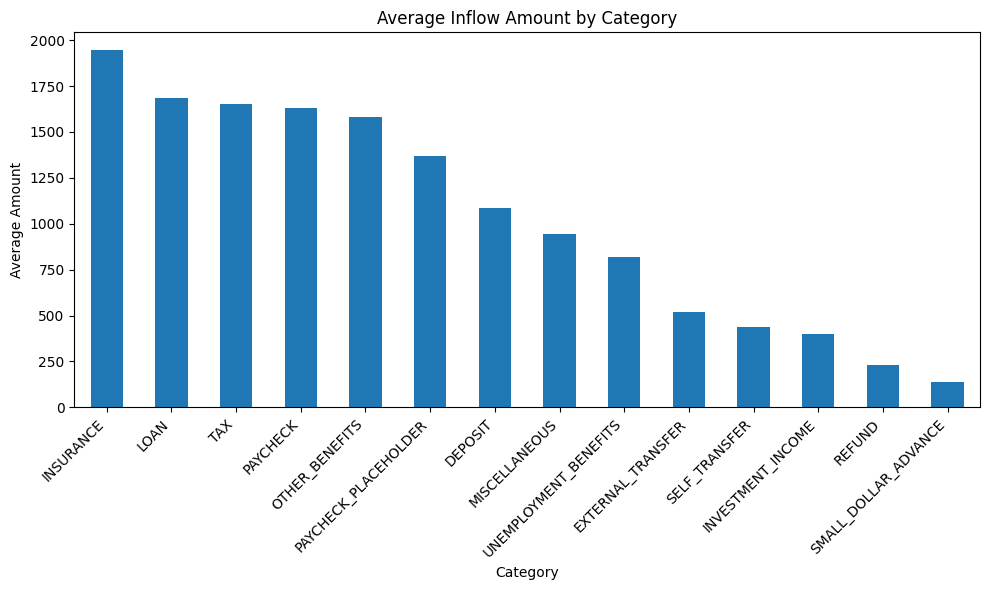

In [37]:
import matplotlib.pyplot as plt

# group and aggregate (mean or sum)
category_amount = inflows.groupby('category')['amount'].mean().sort_values(ascending=False)

# plot bar chart
category_amount.plot(kind='bar', figsize=(10,6))
plt.title('Average Inflow Amount by Category')
plt.xlabel('Category')
plt.ylabel('Average Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Outflows

In [38]:
# avg spending on each category for outflows
outflows.groupby('category')['amount'].mean()

category
ACCOUNT_FEES             16.680846
ATM_CASH                461.570513
AUTOMOTIVE               43.642642
AUTO_LOAN               200.000000
BILLS_UTILITIES          80.432174
BNPL                     45.196040
CHILD_DEPENDENTS         98.622126
CREDIT_CARD_PAYMENT     565.424486
EDUCATION               186.891587
ENTERTAINMENT            33.793896
ESSENTIAL_SERVICES      151.435973
EXTERNAL_TRANSFER       286.112884
FOOD_AND_BEVERAGES       40.564988
GENERAL_MERCHANDISE      57.821981
GIFTS_DONATIONS         136.090153
GROCERIES                51.450581
HEALTHCARE_MEDICAL       66.308042
HOME_IMPROVEMENT        147.030484
INSURANCE               175.727043
LOAN                    377.325598
MORTGAGE               1679.032726
OVERDRAFT                68.611110
PAYCHECK               1253.684135
PETS                     72.111759
RENT                    738.777979
SELF_TRANSFER           219.929513
TAX                    1547.854171
TRAVEL                   55.842056
UNCATEGORIZ

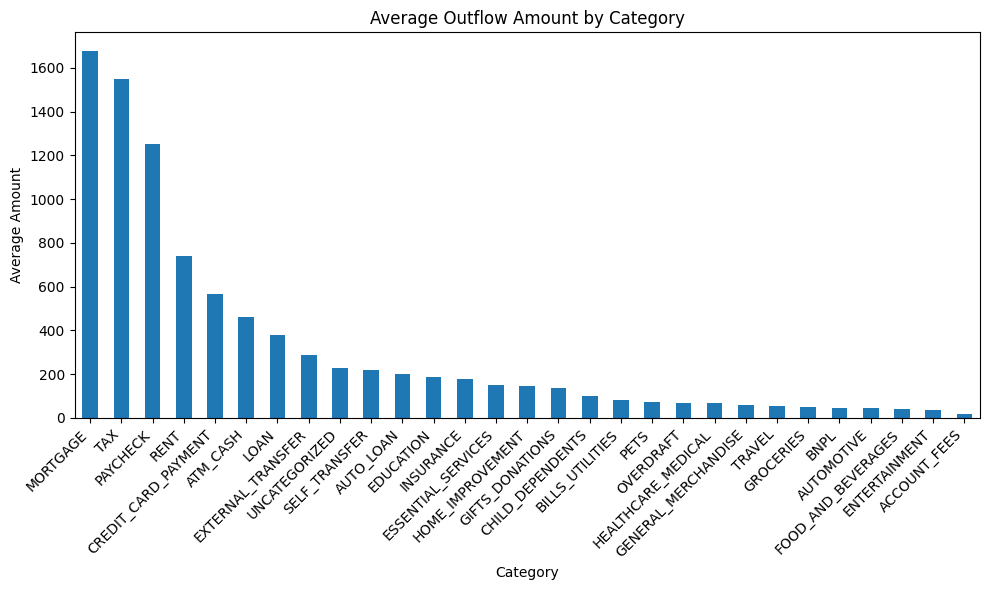

In [39]:
# group and aggregate (mean or sum)
category_amount = outflows.groupby('category')['amount'].mean().sort_values(ascending=False)

# plot bar chart
category_amount.plot(kind='bar', figsize=(10,6))
plt.title('Average Outflow Amount by Category')
plt.xlabel('Category')
plt.ylabel('Average Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Checking the date range of the dataset

In [40]:
# date range for the inflows & outflows
inflows['posted_date'].min(), inflows['posted_date'].max(), '\n', outflows['posted_date'].min(), outflows['posted_date'].max()

(datetime.date(2017, 12, 29),
 datetime.date(2023, 8, 1),
 '\n',
 datetime.date(2017, 12, 29),
 datetime.date(2023, 8, 1))

We can see that both datasets have the same date range of ~5 years from December 29, 2017 to August 1, 2023

### Median Monthly Inflow vs Outflow per User

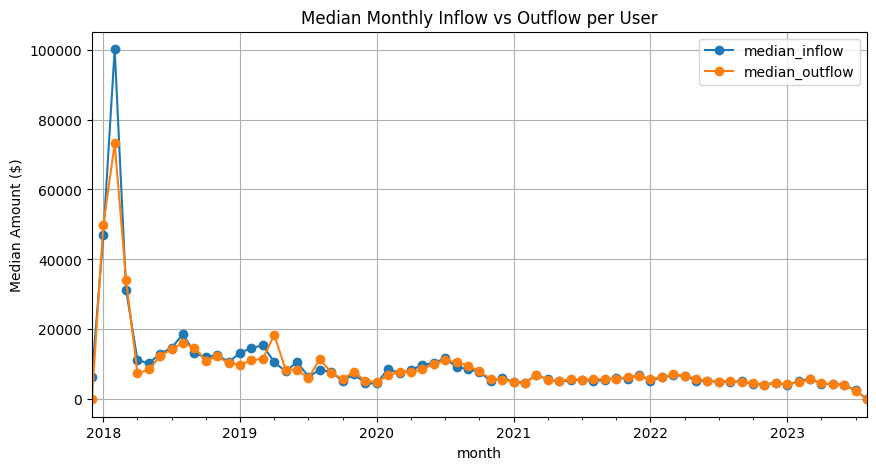

In [41]:
# Converts the dates in each dataset to datetime to extract the months
inflows['posted_date'] = pd.to_datetime(inflows['posted_date'])
outflows['posted_date'] = pd.to_datetime(outflows['posted_date'])

inflows['month'] = inflows['posted_date'].dt.to_period('M').dt.to_timestamp()
outflows['month'] = outflows['posted_date'].dt.to_period('M').dt.to_timestamp()

# Calculates median inflow amount per month per customer
median_inflow = (
    inflows.groupby(['month','prism_consumer_id'])['amount'].sum()
    .groupby('month')
    .median()
    .reset_index(name='median_inflow')
)

median_outflow = (
    outflows.groupby(['month','prism_consumer_id'])['amount'].sum()
    .groupby('month')
    .median()
    .reset_index(name='median_outflow')
)

# Plot chart
monthly_medians = pd.merge(median_inflow, median_outflow, on='month', how='outer')
monthly_medians.plot(x='month', y=['median_inflow','median_outflow'], marker='o', figsize=(10,5))
plt.title('Median Monthly Inflow vs Outflow per User')
plt.ylabel('Median Amount ($)')
plt.grid(True)
plt.show()

The median monthly inflow and outflow per user were plotted to identify possible seasonal trends. Median was used instead of the mean in hopes to get rid of any outliers. Both inflows and outflows peaked in the very beginning and gradually declined and stabilized. This suggests that early users had higher transaction volumes and could be more indicitave of the users themselves as opposed to any general seasonal trends. As a result, no clear monthly or seasonal spending trends were observed, indicating stable consumer behavior over time.

### do we want to keep this (?)

### Inspect the spending on GROCERIES category

In [42]:
# spending in GROCERIES category
outflows[outflows['category']=='GROCERIES'].groupby('memo')['amount'].mean().sort_values(ascending=True)

memo
Refunded Purchase WAL-MART #XXXX                                                                         0.000
Refunded Purchase THORNTONS #XXXX                                                                        0.000
Refunded Purchase IC* INSTACART*ALDI +XXXXXXXXXXX                                                        0.000
Refunded Purchase HAPPY FOOD MART                                                                        0.000
Refunded Purchase WM SUPERC Wal-Mart Sup                                                                 0.000
                                                                                                       ...    
Rps*Camden Old Town Rd                                                                                2113.250
DBT CRD XXXX 98 BCBS SC MARKETPL BILLERPAYMENTSC CARD# XXXX                                           2200.000
JOHNSON MARK LLC 12/07/22 22-XXXXX AARON KRAUSE                                                       7127.

## Most common merchants per category

In [43]:
top_merchants = (
    inflows.groupby('category')['memo']
      .agg(lambda x: x.value_counts().index[0])
      .reset_index(name='most_common_merchant')
)

print(top_merchants)

                 category   most_common_merchant
0                 DEPOSIT                DEPOSIT
1       EXTERNAL_TRANSFER      EXTERNAL_TRANSFER
2               INSURANCE              INSURANCE
3       INVESTMENT_INCOME      INVESTMENT_INCOME
4                    LOAN                   LOAN
5           MISCELLANEOUS          MISCELLANEOUS
6          OTHER_BENEFITS         OTHER_BENEFITS
7                PAYCHECK               PAYCHECK
8    PAYCHECK_PLACEHOLDER   PAYCHECK_PLACEHOLDER
9                  REFUND                 REFUND
10          SELF_TRANSFER          SELF_TRANSFER
11   SMALL_DOLLAR_ADVANCE   SMALL_DOLLAR_ADVANCE
12                    TAX                    TAX
13  UNEMPLOYMENT_BENEFITS  UNEMPLOYMENT_BENEFITS


In [44]:
top_merchants = (
    outflows.groupby('category')['memo']
      .agg(lambda x: x.value_counts().index[0])
      .reset_index(name='most_common_merchant')
)

print(top_merchants)

               category                most_common_merchant
0          ACCOUNT_FEES                        ACCOUNT_FEES
1              ATM_CASH                            ATM_CASH
2            AUTOMOTIVE                          AUTOMOTIVE
3             AUTO_LOAN                           AUTO_LOAN
4       BILLS_UTILITIES                     BILLS_UTILITIES
5                  BNPL                                BNPL
6      CHILD_DEPENDENTS                    CHILD_DEPENDENTS
7   CREDIT_CARD_PAYMENT                 CREDIT_CARD_PAYMENT
8             EDUCATION             Teacherspayteachers.com
9         ENTERTAINMENT                       ENTERTAINMENT
10   ESSENTIAL_SERVICES                  ESSENTIAL_SERVICES
11    EXTERNAL_TRANSFER                   EXTERNAL_TRANSFER
12   FOOD_AND_BEVERAGES                          McDonald's
13  GENERAL_MERCHANDISE                              Amazon
14      GIFTS_DONATIONS                     GIFTS_DONATIONS
15            GROCERIES                 

**The most common merchants for most of the category are basically the same as their category name, some meaningful ones that are not the same are:**
<br>

In [45]:
top_merchants[top_merchants['category']!=top_merchants['most_common_merchant']]

,category,most_common_merchant
8,EDUCATION,Teacherspayteachers.com
12,FOOD_AND_BEVERAGES,McDonald's
13,GENERAL_MERCHANDISE,Amazon
15,GROCERIES,Walmart
20,MORTGAGE,HUNTINGTON MORTG ONLINE PMT XXXXXX
21,OVERDRAFT,Overdraft Item Fee
23,PETS,PetSmart
24,RENT,SOUTHERN INVESTO WEB PMTS
27,TRAVEL,Uber


# Train/Test Split

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import ks_2samp

Performing a train-test-split with 75% train and 25% test. We are splitting them by the `prism_consumer_ids` and are creating two different sets for both the inflows and outflows.

## Inflows

In [47]:
### Train/Test Split
unique_consumer_ids = inflows['prism_consumer_id'].unique()

inflows_train_ids, inflows_test_ids = train_test_split(
    unique_consumer_ids,
    test_size=0.25,
    random_state=42,
)

inflows_train_df = inflows[inflows['prism_consumer_id'].isin(inflows_train_ids)]
inflows_test_df  = inflows[inflows['prism_consumer_id'].isin(inflows_test_ids)]

print(f'Train Shape: {inflows_train_df.shape}')
print(f'Test Shape: {inflows_test_df.shape}')

Train Shape: (385779, 7)
Test Shape: (127336, 7)


### I. Category Distribution Comparison
The first statistical test conducted was a comparison in the category distribution between the train and test sets to ensure no bias. Each category's relative frequency and was calculated, along with the absolute difference. Because the absolute differences are relatively small, generally smaller than 0.015, this shows that there is consistency between the sets.

In [48]:
# Comparing category distribution between sets
in_cat_distribution = pd.DataFrame({
    'train': inflows_train_df['category'].value_counts(normalize=True),
    'test':  inflows_test_df['category'].value_counts(normalize=True)
})
in_cat_distribution['absolute_diff'] = (in_cat_distribution['train'] - in_cat_distribution['test']).abs()

in_cat_distribution

,train,test,absolute_diff
category,,,
DEPOSIT,0.121181,0.114626,0.006555
EXTERNAL_TRANSFER,0.308342,0.295133,0.013210
INSURANCE,0.000389,0.000188,0.000200
INVESTMENT_INCOME,0.034305,0.032128,0.002177
LOAN,0.004656,0.005631,0.000975
MISCELLANEOUS,0.104969,0.119000,0.014031
OTHER_BENEFITS,0.013619,0.019272,0.005653
PAYCHECK,0.063998,0.066352,0.002354
PAYCHECK_PLACEHOLDER,0.049969,0.053481,0.003512


### II. KS Sample
The second statistical test performed was a two-sample KS test which compares the distributions of the median transaction amounts per customer between the training and test sets. Because the KS statistic was small (0.038) and the p-value (0.385) is greater than > 0.05, this indicates that there is no significant difference between the distributions


In [49]:
in_train_median = inflows_train_df.groupby('prism_consumer_id')['amount'].median()
in_test_median = inflows_test_df.groupby('prism_consumer_id')['amount'].median()

print(ks_2samp(in_train_median, in_test_median))

KstestResult(statistic=np.float64(0.03795626597232268), pvalue=np.float64(0.385021769005963), statistic_location=np.float64(84.42), statistic_sign=np.int8(1))


### Outflows

In [50]:
### Train/Test Split
unique_consumer_ids = outflows['prism_consumer_id'].unique()

outflows_train_ids, outflows_test_ids = train_test_split(
    unique_consumer_ids,
    test_size=0.25,
    random_state=42,
)

outflows_train_df = outflows[outflows['prism_consumer_id'].isin(outflows_train_ids)]
outflows_test_df  = outflows[outflows['prism_consumer_id'].isin(outflows_test_ids)]

print(f'Train Shape: {outflows_train_df.shape}')
print(f'Test Shape: {outflows_test_df.shape}')

Train Shape: (1968940, 7)
Test Shape: (628548, 7)


### I. Category Distribution Comparison
Similar to the inflows splits, we conduced a category distribution comparison. Because the absolute differences are relatively small, generally smaller than 0.012, this shows that there is consistency between the sets.


In [51]:
# Comparing category distribution between sets
out_cat_distribution = pd.DataFrame({
    'train': outflows_train_df['category'].value_counts(normalize=True),
    'test':  outflows_test_df['category'].value_counts(normalize=True)
})
out_cat_distribution['absolute_diff'] = (out_cat_distribution['train'] - out_cat_distribution['test']).abs()

out_cat_distribution

,train,test,absolute_diff
category,,,
ACCOUNT_FEES,1.405071e-02,0.015665,0.001614
ATM_CASH,4.320650e-02,0.051834,0.008627
AUTOMOTIVE,8.149969e-02,0.076543,0.004957
AUTO_LOAN,5.078875e-07,NaN,NaN
BILLS_UTILITIES,5.078875e-07,0.000035,0.000034
BNPL,4.819852e-04,0.000945,0.000463
CHILD_DEPENDENTS,4.103731e-04,0.000204,0.000207
CREDIT_CARD_PAYMENT,2.822128e-02,0.031724,0.003503
EDUCATION,1.694821e-03,0.001849,0.000154


### II. KS Sample
Similar to the inflows splits, we conduced a twp-sample KS test. Because the KS statistic was small (0.046) and the p-value (0.173) is greater than > 0.05, this indicates that there is no significant difference between the distributions.

In [52]:
# Amount comparison
out_train_median = outflows_train_df.groupby('prism_consumer_id')['amount'].median()
out_test_median = outflows_test_df.groupby('prism_consumer_id')['amount'].median()

print(ks_2samp(out_train_median, out_test_median))

KstestResult(statistic=np.float64(0.04672057502246182), pvalue=np.float64(0.1733501531105168), statistic_location=np.float64(28.85), statistic_sign=np.int8(1))
